In [1]:
# Import necessary libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Preprocess the input data
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [4]:
# Build the neural network model
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [5]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 13s 24ms/step - loss: 0.2493 - accuracy: 0.9255 - val_loss: 0.1189 - val_accuracy: 0.9613
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1033 - accuracy: 0.9682 - val_loss: 0.0884 - val_accuracy: 0.9724
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0745 - accuracy: 0.9772 - val_loss: 0.0654 - val_accuracy: 0.9809
Epoch 4/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0584 - accuracy: 0.9807 - val_loss: 0.0807 - val_accuracy: 0.9748
Epoch 5/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0440 - accuracy: 0.9854 - val_loss: 0.0589 - val_accuracy: 0.9813
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0733 - val_accuracy: 0.9792
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0679 - val_accuracy:

In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06311443448066711
Test accuracy: 0.9830999970436096


In [8]:
# Predict the class labels for the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print the first 11 predicted labels
print(y_pred[:11])

313/313 [==============================] - 1s 4ms/step
[7 2 1 0 4 1 4 9 5 9 0]


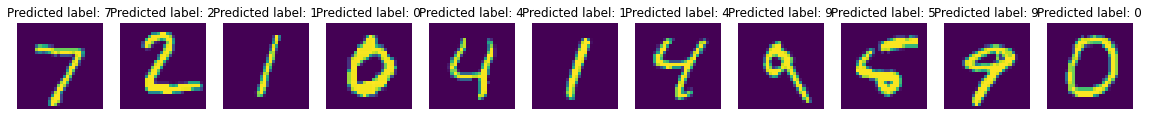

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 11, figsize=(20, 2))
for i in range(11):
    axs[i].imshow(X_test[i].reshape(28, 28))  # Reshape the input data back to a 2D image
    axs[i].set_title(f"Predicted label: {y_pred[i]}")
    axs[i].axis("off")

plt.show()